In [1]:
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


def custom_sum(delta_materials_row):
    total = 0
    for val in delta_materials_row:
        if val == 4:
            total += 3
        else:
            total += val
    return total

def custom_max(delta_materials_row):
    max_val = max(delta_materials_row)
    return 3 if max_val == 4 else max_val

def custom_immediate_val_1(delta_materials_row):
    return 3 if delta_materials_row[0] == 4 else delta_materials_row[0]

def custom_immediate_val_2(delta_materials_row):
    return 3 if delta_materials_row[1] == 4 else delta_materials_row[1]

def custom_immediate_val_3(delta_materials_row):
    return 3 if delta_materials_row[2] == 4 else delta_materials_row[2]

def active_material_sum(delta_materials, move_match):
    active_material_sum_hm = defaultdict(list)    # {sum : [total_correct, total]}
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_sum = custom_sum(active_player_delta)
        if active_material_sum not in active_material_sum_hm:
            active_material_sum_hm[active_material_sum] = [0, 0]
        
        if move_match[i] == 1:
            active_material_sum_hm[active_material_sum][0] += 1
            active_material_sum_hm[active_material_sum][1] += 1
        else:
            active_material_sum_hm[active_material_sum][1] += 1
    
    active_material_sums, accuracies = [], []
    for active_material_sum, [total_correct, total] in active_material_sum_hm.items():
        active_material_sums.append(active_material_sum)
        accuracies.append(total_correct / total)
    return [np.array(active_material_sums), np.array(accuracies)]


def active_material_max(delta_materials, move_match):
    active_material_max_hm = defaultdict(list)    # {max : [total_correct, total]}
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_max = custom_max(active_player_delta)
        if active_material_max not in active_material_max_hm:
            active_material_max_hm[active_material_max] = [0, 0]
        
        if move_match[i] == 1:
            active_material_max_hm[active_material_max][0] += 1
            active_material_max_hm[active_material_max][1] += 1
        else:
            active_material_max_hm[active_material_max][1] += 1
    
    active_material_maxes, accuracies = [], []
    for active_material_max, [total_correct, total] in active_material_max_hm.items():
        active_material_maxes.append(active_material_max)
        accuracies.append(total_correct / total)
    return [np.array(active_material_maxes), np.array(accuracies)]


def active_material_loss(delta_materials, move_match):
    active_material_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        active_material_loss = custom_sum(active_player_delta) - custom_sum(opponent_delta)
        if active_material_loss not in active_material_loss_hm:
            active_material_loss_hm[active_material_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_material_loss_hm[active_material_loss][0] += 1
            active_material_loss_hm[active_material_loss][1] += 1
        else:
            active_material_loss_hm[active_material_loss][1] += 1
            
    active_material_losses, accuracies = [], []
    for active_material_loss, [total_correct, total] in active_material_loss_hm.items():
        active_material_losses.append(active_material_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_material_loss, total_correct, total, total_correct/total)
    return [np.array(active_material_losses), np.array(accuracies)]

def active_immediate_loss_1(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_1(active_player_delta) - custom_immediate_val_1(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
    return [np.array(active_immediate_losses), np.array(accuracies)]

# make this immediate loss plot for depths 3-4 (2nd move of each player) and depths 5-6 (3rd move of each player)
def active_immediate_loss_2(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_2(active_player_delta) - custom_immediate_val_2(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
    return [np.array(active_immediate_losses), np.array(accuracies)]

def active_immediate_loss_3(delta_materials, move_match):
    active_immediate_loss_hm = defaultdict(list)
    for i, [active_player_delta, opponent_delta] in enumerate(delta_materials):
        immediate_loss = custom_immediate_val_3(active_player_delta) - custom_immediate_val_3(opponent_delta)
        if immediate_loss not in active_immediate_loss_hm:
            active_immediate_loss_hm[immediate_loss] = [0, 0]
            
        if move_match[i] == 1:
            active_immediate_loss_hm[immediate_loss][0] += 1
            active_immediate_loss_hm[immediate_loss][1] += 1
        else:
            active_immediate_loss_hm[immediate_loss][1] += 1
            
    active_immediate_losses, accuracies = [], []
    for active_immediate_loss, [total_correct, total] in active_immediate_loss_hm.items():
        active_immediate_losses.append(active_immediate_loss)
        accuracies.append(total_correct / total)
        # print("print:", active_immediate_loss, total_correct, total, total_correct/total)
    return [np.array(active_immediate_losses), np.array(accuracies)]

In [2]:
# Novice elo range: 0-1199
# results_folder_only_novice_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_novice_elo'
results_folder_only_novice_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_novice_elo_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 22000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_novice = []
all_move_matches_novice = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_novice = os.path.join(results_folder_only_novice_elo, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_novice, 'rb') as f:
        delta_materials_novice = np.load(f, allow_pickle=True)
        all_delta_materials_novice.append(delta_materials_novice)

    move_match_path_novice = os.path.join(results_folder_only_novice_elo, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_novice, 'rb') as f:
        move_matches_novice = np.load(f, allow_pickle=True)
        all_move_matches_novice.append(move_matches_novice)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_novice = np.concatenate(all_delta_materials_novice)
print(combined_delta_materials_novice.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_novice = np.concatenate(all_move_matches_novice)
print(combined_move_matches_novice.shape)
# print(combined_move_matches)

(880781, 36)
(880781,)


In [3]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_novice = np.delete(combined_delta_materials_novice, [0,6,12,18,24,30], axis=1)

In [4]:
# run a logistic regression from translated_delta_materials to combined_move_matches --> 36 beta weights
# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_novice = combined_move_matches_novice.reshape(-1, 1)

# Create a logistic regression model
log_reg_novice = LogisticRegression(fit_intercept=True, C=float("inf"))

# Fit the model to your data
log_reg_novice.fit(combined_delta_materials_novice, combined_move_matches_novice)

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_novice = log_reg_novice.coef_
intercept_novice = log_reg_novice.intercept_

np.set_printoptions(suppress=True)

# The shape of beta_weights will be (1, 36), containing the coefficients for each column in translated_delta_materials
beta_weights_novice = beta_weights_novice.reshape(6,5)
print(beta_weights_novice)
print("intercept:", intercept_novice)

/usr/licensed/anaconda3/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[ 1.01842323  1.56014902  1.77411618  2.04880434  2.28988738]
 [-0.22232872 -0.57413279 -0.75533116 -0.59101661 -1.29459069]
 [-0.13929854  0.05448843  0.10408215  0.21329502  0.37864918]
 [-0.03783445 -0.1206151  -0.21965895 -0.06531629 -0.26242378]
 [-0.10791082 -0.06560706 -0.08893028 -0.04591776 -0.03069213]
 [ 0.04878411 -0.07612274 -0.10513761  0.018643   -0.02486449]]
intercept: [-1.01125142]


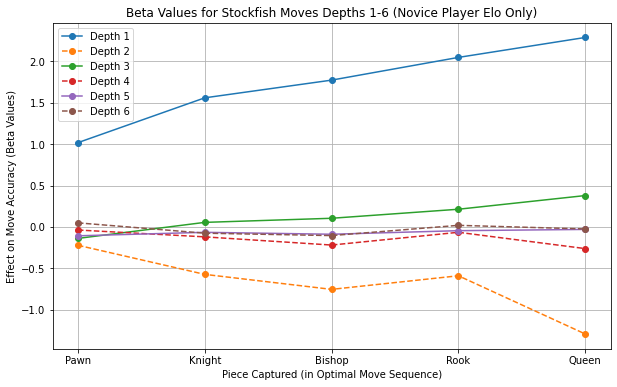

In [5]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_novice[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_novice[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Novice Player Elo Only)')
plt.legend()
plt.grid(True)
plt.show()

[  1   2   0  -5  -1   3  -6  -3   7  -9  -2   4  -4   5  -7  -8   6 -12
   8 -14   9  10 -11 -15 -10  17  13 -17  12  15 -13  14  11 -19  19 -16
  16  18]


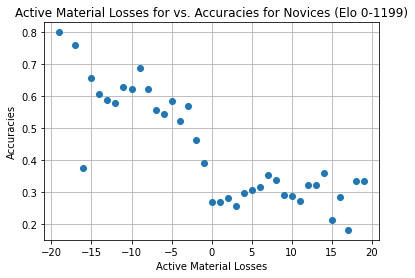

print: 1 10346 49059 0.21088892965612835
print: 0 166190 610000 0.27244262295081967
print: -3 34101 50075 0.68099850224663
print: 3 6153 27625 0.22273303167420813
print: 2 3144 11160 0.2817204301075269
print: -9 6512 8594 0.7577379567139865
print: -5 10370 13850 0.7487364620938628
print: -1 35095 69091 0.5079532790088435
print: -2 7780 11922 0.6525750712967623
print: 5 2609 9378 0.2782043079547878
print: -4 2076 2808 0.7393162393162394
print: 4 809 2849 0.28395928395928394
print: 9 1302 5832 0.22325102880658437
print: 8 527 1499 0.35156771180787194
print: -6 2333 3151 0.7403998730561726
print: 6 915 2809 0.3257386970452118
print: -8 798 1079 0.7395736793327155
[ 1  0 -3  3  2 -9 -5 -1 -2  5 -4  4  9  8 -6  6 -8]


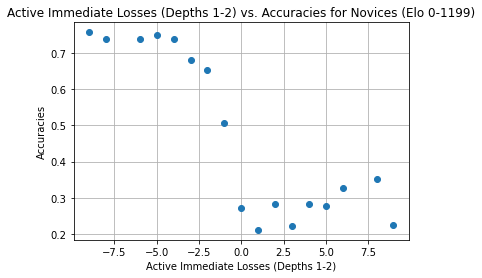

print: 0 209692 631465 0.33207224470081476
print: -1 19373 61466 0.31518237724921094
print: 3 9350 28260 0.3308563340410474
print: 1 18020 54515 0.3305512244336421
print: -3 11196 36258 0.30878702631143473
print: -2 3686 11001 0.33506044905008636
print: -5 4587 12285 0.3733821733821734
print: 5 3070 8339 0.368149658232402
print: -6 1030 3020 0.34105960264900664
print: 2 2862 9423 0.3037249283667622
print: 4 796 2371 0.3357233234921974
print: -8 346 1083 0.31948291782086796
print: 9 2037 5776 0.3526662049861496
print: -9 2842 8878 0.32011714350078846
print: -4 1092 3225 0.3386046511627907
print: 8 417 1365 0.3054945054945055
print: 6 664 2051 0.32374451487079475
[ 0 -1  3  1 -3 -2 -5  5 -6  2  4 -8  9 -9 -4  8  6]


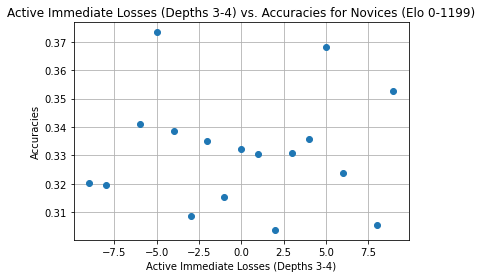

print: 0 210013 635625 0.3304039331366765
print: 3 9656 30115 0.3206375560351984
print: -3 9842 31571 0.3117417883500681
print: -1 20188 60211 0.33528757203833187
print: 1 21008 60492 0.34728559148317134
print: 5 2971 8336 0.3564059500959693
print: -5 3463 10391 0.3332691752478106
print: 9 2057 5878 0.34994896223205174
print: 4 798 2547 0.3133097762073027
print: -9 2481 7834 0.3166964513658412
print: -2 2982 9805 0.3041305456399796
print: 8 457 1339 0.3412994772218073
print: 2 2918 9333 0.3126540233579771
print: -4 835 2743 0.3044112285818447
print: -6 553 1914 0.2889237199582027
print: 6 546 1671 0.3267504488330341
print: -8 292 976 0.29918032786885246
[ 0  3 -3 -1  1  5 -5  9  4 -9 -2  8  2 -4 -6  6 -8]


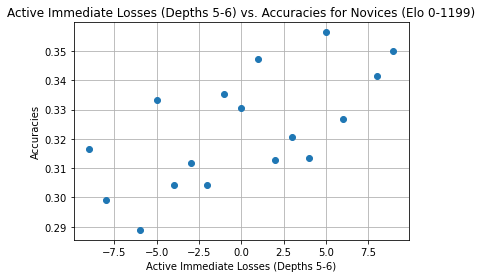

In [3]:
#------------------------plotting step---------------------------------
active_material_losses_novice, accuracies_novice = active_material_loss(combined_delta_materials_novice, combined_move_matches_novice)

plt.plot(active_material_losses_novice, accuracies_novice, marker='o', linestyle='')
print(active_material_losses_novice)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses for vs. Accuracies for Novices (Elo 0-1199)')
plt.grid(True)
plt.show()


active_immediate_losses_novice, accuracies_ail_novice = active_immediate_loss_1(combined_delta_materials_novice, combined_move_matches_novice)
print(active_immediate_losses_novice)
plt.plot(active_immediate_losses_novice, accuracies_ail_novice, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Novices (Elo 0-1199)')
plt.grid(True)
plt.show()

active_immediate_losses_2_novice, accuracies_ail_2_novice = active_immediate_loss_2(combined_delta_materials_novice, combined_move_matches_novice)
print(active_immediate_losses_2_novice)
plt.plot(active_immediate_losses_2_novice, accuracies_ail_2_novice, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Novices (Elo 0-1199)')
plt.grid(True)
plt.show()

active_immediate_losses_3_novice, accuracies_ail_3_novice = active_immediate_loss_3(combined_delta_materials_novice, combined_move_matches_novice)
print(active_immediate_losses_3_novice)
plt.plot(active_immediate_losses_3_novice, accuracies_ail_3_novice, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Novices (Elo 0-1199)')
plt.grid(True)
plt.show()

In [6]:
# Amateur elo range: 1200-1599
# results_folder_only_amateur_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_amateur_elo'
results_folder_only_amateur_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_amateur_elo_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_amateur = []
all_move_matches_amateur = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_amateur = os.path.join(results_folder_only_amateur_elo, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_amateur, 'rb') as f:
        delta_materials_amateur = np.load(f, allow_pickle=True)
        all_delta_materials_amateur.append(delta_materials_amateur)

    move_match_path_amateur = os.path.join(results_folder_only_amateur_elo, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_amateur, 'rb') as f:
        move_matches_amateur = np.load(f, allow_pickle=True)
        all_move_matches_amateur.append(move_matches_amateur)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_amateur = np.concatenate(all_delta_materials_amateur)
print(combined_delta_materials_amateur.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_amateur = np.concatenate(all_move_matches_amateur)
print(combined_move_matches_amateur.shape)
# print(combined_move_matches)

(3078290, 36)
(3078290,)


In [7]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_amateur = np.delete(combined_delta_materials_amateur, [0,6,12,18,24,30], axis=1)

In [8]:
# run a logistic regression from translated_delta_materials to combined_move_matches --> 36 beta weights
# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_amateur = combined_move_matches_amateur.reshape(-1, 1)

# Create a logistic regression model
log_reg_amateur = LogisticRegression(fit_intercept=True, C=float("inf"))

# Fit the model to your data
log_reg_amateur.fit(combined_delta_materials_amateur, combined_move_matches_amateur)

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_amateur = log_reg_amateur.coef_
intercept_amateur = log_reg_amateur.intercept_

np.set_printoptions(suppress=True)

# The shape of beta_weights will be (1, 36), containing the coefficients for each column in translated_delta_materials
beta_weights_amateur = beta_weights_amateur.reshape(6,5)
print(beta_weights_amateur)
print("intercept:", intercept_amateur)

/usr/licensed/anaconda3/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[ 1.11537466  1.68107339  1.93040347  2.19387079  2.66348306]
 [-0.24141731 -0.63760148 -0.84898185 -0.78410225 -1.47542802]
 [-0.07518078  0.18558033  0.20911721  0.37443201  0.55592562]
 [-0.05782753 -0.20263266 -0.26797819 -0.17491366 -0.38709706]
 [-0.07068295  0.00096171 -0.01010114  0.05590072  0.11592279]
 [ 0.0279871  -0.1172565  -0.12067251 -0.04311413 -0.07674878]]
intercept: [-0.80648943]


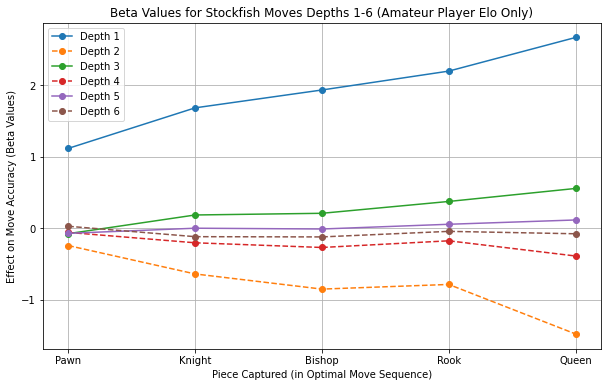

In [9]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_amateur[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_amateur[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Amateur Player Elo Only)')
plt.legend()
plt.grid(True)
plt.show()

[  0  -1  -2   3  -4  -3  -5   2   1   4   5  -8   6  -9   9  -6  13  10
  -7   8   7 -10  11 -11 -12  12  15 -14 -17  14  17 -13 -15 -16  19 -18
  16 -19  20  18]


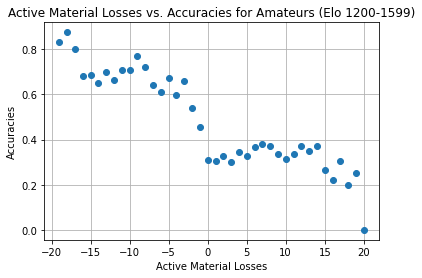

print: 0 708889 2218097 0.31959332707271143
print: -1 126512 214300 0.5903499766682221
print: 1 42968 175835 0.2443654562515995
print: -2 26453 35106 0.7535179171651569
print: -3 109483 143766 0.76153610728545
print: -6 5350 6521 0.8204263149823646
print: 5 9611 31512 0.30499492256918
print: -5 32131 39628 0.8108155849399414
print: 3 25271 94891 0.2663160889863106
print: 6 3217 8456 0.3804399243140965
print: -9 19615 23302 0.8417732383486396
print: 4 3954 11135 0.3550965424337674
print: 9 4481 19732 0.22709304682748835
print: 2 13164 39326 0.33474037532421297
print: -4 7218 8794 0.8207869001591994
print: -8 2620 3106 0.8435286542176432
print: 8 1639 4783 0.3426719632030107
[ 0 -1  1 -2 -3 -6  5 -5  3  6 -9  4  9  2 -4 -8  8]


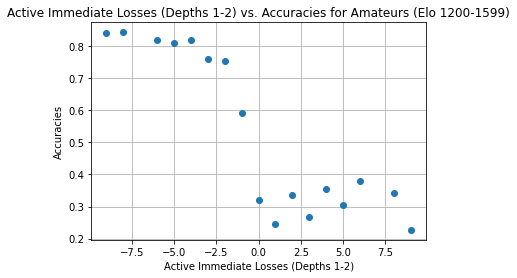

print: 0 833549 2246794 0.3709948486599127
print: 3 35076 92811 0.377929340272166
print: -1 73888 206378 0.35802265745379835
print: -2 13800 35960 0.38375973303670746
print: 2 11683 32483 0.35966505556752765
print: 1 69727 188021 0.370846873487536
print: 5 11796 29110 0.405221573342494
print: -5 16494 39412 0.4185019790926621
print: 9 8301 20439 0.4061353295170997
print: -4 4461 11019 0.4048461747890008
print: -3 41176 114826 0.35859474335080904
print: -9 10310 28266 0.36474916861246726
print: 4 3726 9740 0.38254620123203287
print: 8 1620 4873 0.3324440796224092
print: -6 3328 8121 0.40980174855313384
print: 6 2400 6469 0.37100015458339775
print: -8 1241 3568 0.3478139013452915
[ 0  3 -1 -2  2  1  5 -5  9 -4 -3 -9  4  8 -6  6 -8]


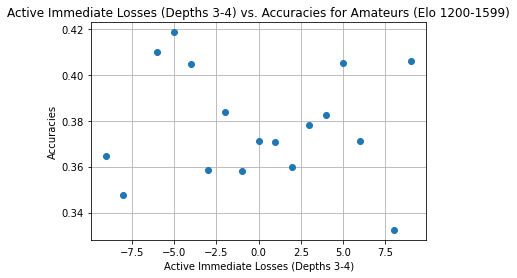

print: 0 831118 2245642 0.37010262544074257
print: -3 37024 102949 0.3596343820726768
print: 3 35697 99373 0.35922232397130005
print: -2 11257 32313 0.3483737195555968
print: -1 77260 205195 0.3765198957089598
print: 1 80093 206812 0.3872744328182117
print: -4 3823 10219 0.3741070554848811
print: -5 13616 35073 0.38821885781085164
print: 5 11566 29896 0.38687449826063686
print: 2 11255 31993 0.35179570531053667
print: 4 3918 10379 0.37749301474130453
print: 9 8374 21025 0.39828775267538646
print: -9 10195 27042 0.37700613859921606
print: -6 2119 5892 0.35964019008825526
print: 8 1834 5053 0.36295270136552543
print: 6 2163 5937 0.3643254168772107
print: -8 1264 3497 0.3614526737203317
[ 0 -3  3 -2 -1  1 -4 -5  5  2  4  9 -9 -6  8  6 -8]


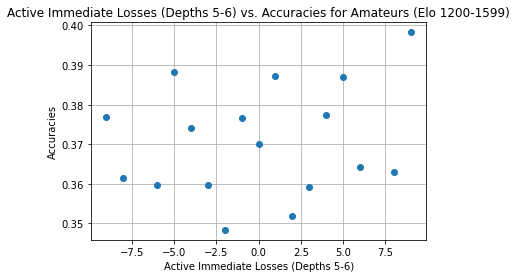

In [6]:
active_material_losses_amateur, accuracies_amateur = active_material_loss(combined_delta_materials_amateur, combined_move_matches_amateur)

plt.plot(active_material_losses_amateur, accuracies_amateur, marker='o', linestyle='')
print(active_material_losses_amateur)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses vs. Accuracies for Amateurs (Elo 1200-1599)')
plt.grid(True)
plt.show()


active_immediate_losses_amateur, accuracies_ail_amateur = active_immediate_loss_1(combined_delta_materials_amateur, combined_move_matches_amateur)
print(active_immediate_losses_amateur)
plt.plot(active_immediate_losses_amateur, accuracies_ail_amateur, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Amateurs (Elo 1200-1599)')
plt.grid(True)
plt.show()

active_immediate_losses_2_amateur, accuracies_ail_2_amateur = active_immediate_loss_2(combined_delta_materials_amateur, combined_move_matches_amateur)
print(active_immediate_losses_2_amateur)
plt.plot(active_immediate_losses_2_amateur, accuracies_ail_2_amateur, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Amateurs (Elo 1200-1599)')
plt.grid(True)
plt.show()

active_immediate_losses_3_amateur, accuracies_ail_3_amateur = active_immediate_loss_3(combined_delta_materials_amateur, combined_move_matches_amateur)
print(active_immediate_losses_3_amateur)
plt.plot(active_immediate_losses_3_amateur, accuracies_ail_3_amateur, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Amateurs (Elo 1200-1599)')
plt.grid(True)
plt.show()

In [10]:
# Advanced elo range 1600-1999
# results_folder_only_advanced_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_advanced_elo'
results_folder_only_advanced_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_advanced_elo_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_advanced = []
all_move_matches_advanced = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_advanced = os.path.join(results_folder_only_advanced_elo, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_advanced, 'rb') as f:
        delta_materials_advanced = np.load(f, allow_pickle=True)
        all_delta_materials_advanced.append(delta_materials_advanced)

    move_match_path_advanced = os.path.join(results_folder_only_advanced_elo, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_advanced, 'rb') as f:
        move_matches_advanced = np.load(f, allow_pickle=True)
        all_move_matches_advanced.append(move_matches_advanced)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_advanced = np.concatenate(all_delta_materials_advanced)
print(combined_delta_materials_advanced.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_advanced = np.concatenate(all_move_matches_advanced)
print(combined_move_matches_advanced.shape)
# print(combined_move_matches)

(2341944, 36)
(2341944,)


In [11]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_advanced = np.delete(combined_delta_materials_advanced, [0,6,12,18,24,30], axis=1)

In [12]:
# run a logistic regression from translated_delta_materials to combined_move_matches --> 36 beta weights
# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_advanced = combined_move_matches_advanced.reshape(-1, 1)

# Create a logistic regression model
log_reg_advanced = LogisticRegression(fit_intercept=True, C=float("inf"))

# Fit the model to your data
log_reg_advanced.fit(combined_delta_materials_advanced, combined_move_matches_advanced)

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_advanced = log_reg_advanced.coef_
intercept_advanced = log_reg_advanced.intercept_

np.set_printoptions(suppress=True)

# The shape of beta_weights will be (1, 36), containing the coefficients for each column in translated_delta_materials
beta_weights_advanced = beta_weights_advanced.reshape(6,5)
print(beta_weights_advanced)
print("intercept:", intercept_advanced)

/usr/licensed/anaconda3/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[ 1.15097811  1.64909822  1.94967824  2.20290099  2.77976516]
 [-0.30807986 -0.73111544 -0.9463735  -0.99318414 -1.64306116]
 [ 0.02129115  0.32384622  0.3508019   0.57292717  0.84598424]
 [-0.06914661 -0.30237265 -0.35391186 -0.31432123 -0.58004816]
 [-0.00968565  0.1156183   0.09540517  0.13819574  0.26830199]
 [-0.00265892 -0.15359234 -0.16273051 -0.0774844  -0.12245553]]
intercept: [-0.61563797]


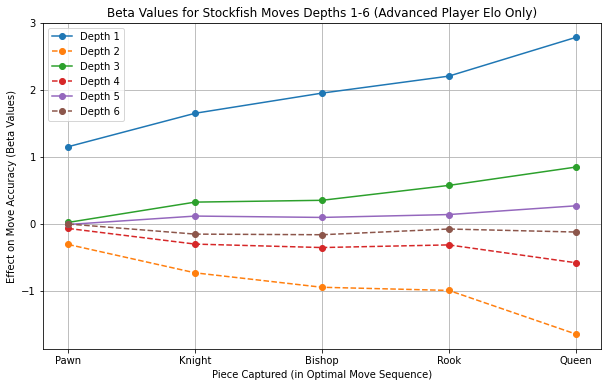

In [13]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_advanced[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_advanced[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Advanced Player Elo Only)')
plt.legend()
plt.grid(True)
plt.show()

[  0  -1   1   3   5  -3  -9  -2  -4   4   2   8  -5   6  -8  11   9 -14
  19  -6  10  -7 -12   7 -10  12 -11 -17 -13  15  13  18  14 -19 -15 -18
 -16  17  16]


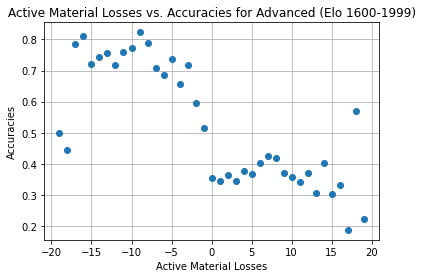

print: 0 628527 1728138 0.3637018571433531
print: 1 38503 136903 0.28124292382197613
print: -1 96471 147887 0.6523291431971708
print: -3 74482 92580 0.8045150140419097
print: 4 3794 9128 0.4156441717791411
print: -8 1894 2128 0.8900375939849624
print: 5 7900 23191 0.3406493898495106
print: -5 22854 26813 0.8523477417670533
print: 3 22692 73404 0.30913846656857935
print: 2 11775 29627 0.3974415229351605
print: -4 5475 6310 0.8676703645007924
print: 6 2364 5537 0.4269459996387936
print: -2 18707 23542 0.7946223770282899
print: -9 13435 15097 0.8899119030270914
print: 9 3956 14718 0.26878651990759617
print: -6 2984 3438 0.8679464805119256
print: 8 1377 3503 0.3930916357407936
[ 0  1 -1 -3  4 -8  5 -5  3  2 -4  6 -2 -9  9 -6  8]


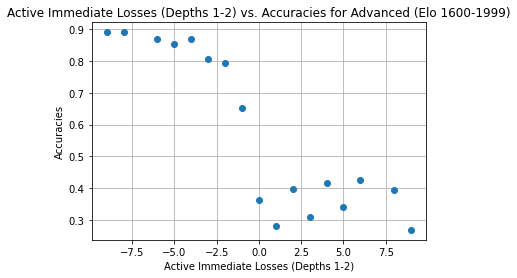

print: 0 702149 1727620 0.40642560285247914
print: -1 60997 151401 0.40288373260414395
print: 1 58754 141166 0.4162050352067778
print: 5 9709 21929 0.44274704728897807
print: -9 8566 19904 0.4303657556270096
print: -2 10988 25598 0.42925228533479176
print: 4 3465 8129 0.42625169147496617
print: -5 13050 28130 0.4639175257731959
print: -3 33080 82944 0.3988233024691358
print: 2 9846 24517 0.4015988905657299
print: 6 1995 4639 0.43004957965078683
print: 3 29113 70730 0.4116075215608653
print: -4 3876 8405 0.4611540749553837
print: 9 6646 15216 0.4367770767613039
print: -6 2384 5010 0.47584830339321355
print: 8 1520 4029 0.37726482998262595
print: -8 1052 2577 0.4082266201008925
[ 0 -1  1  5 -9 -2  4 -5 -3  2  6  3 -4  9 -6  8 -8]


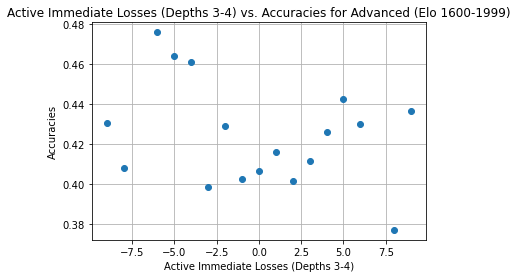

print: 0 700051 1721571 0.4066349863003036
print: 3 29316 74139 0.3954194148828552
print: 1 64427 153321 0.42020988644738816
print: 4 3583 8584 0.4174044734389562
print: 5 9745 22546 0.4322274461101748
print: -5 11366 26201 0.4338002366321896
print: -1 63582 151935 0.41848158752097936
print: -4 3363 8093 0.4155442975410849
print: -2 9498 24015 0.39550281074328547
print: 2 9577 24235 0.3951722715081494
print: -3 31108 76637 0.4059135926510693
print: 6 1715 4202 0.40813898143741073
print: -9 8483 20007 0.42400159944019594
print: 9 6926 15643 0.44275394745253466
print: 8 1622 3971 0.4084613447494334
print: -6 1684 4052 0.4155972359328727
print: -8 1144 2792 0.40974212034383956
[ 0  3  1  4  5 -5 -1 -4 -2  2 -3  6 -9  9  8 -6 -8]


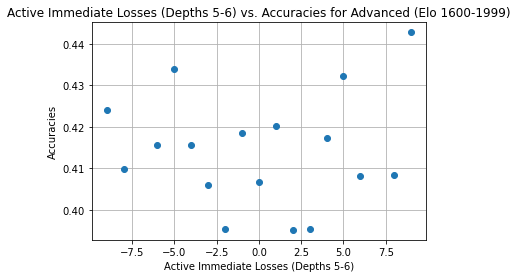

In [9]:
active_material_losses_advanced, accuracies_advanced = active_material_loss(combined_delta_materials_advanced, combined_move_matches_advanced)
plt.plot(active_material_losses_advanced, accuracies_advanced, marker='o', linestyle='')
print(active_material_losses_advanced)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses vs. Accuracies for Advanced (Elo 1600-1999)')
plt.grid(True)
plt.show()


active_immediate_losses_advanced, accuracies_ail_advanced = active_immediate_loss_1(combined_delta_materials_advanced, combined_move_matches_advanced)
print(active_immediate_losses_advanced)
plt.plot(active_immediate_losses_advanced, accuracies_ail_advanced, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Advanced (Elo 1600-1999)')
plt.grid(True)
plt.show()

active_immediate_losses_2_advanced, accuracies_ail_2_advanced = active_immediate_loss_2(combined_delta_materials_advanced, combined_move_matches_advanced)
print(active_immediate_losses_2_advanced)
plt.plot(active_immediate_losses_2_advanced, accuracies_ail_2_advanced, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Advanced (Elo 1600-1999)')
plt.grid(True)
plt.show()

active_immediate_losses_3_advanced, accuracies_ail_3_advanced = active_immediate_loss_3(combined_delta_materials_advanced, combined_move_matches_advanced)
print(active_immediate_losses_3_advanced)
plt.plot(active_immediate_losses_3_advanced, accuracies_ail_3_advanced, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 5-6) vs. Accuracies for Advanced (Elo 1600-1999)')
plt.grid(True)
plt.show()

In [14]:
# Master elo range 2000+
# results_folder_only_master_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_4_only_master_elo'
results_folder_only_master_elo = r'/scratch/gpfs/allenwu/analysis_results_Mar_2023_cluster_master_elo_translated'

job_indices_hm = defaultdict(list)
moves_per_run = 30000
n_total_runs = 300

for i in range(0, n_total_runs):
    start_idx = i * moves_per_run
    end_idx = ((i+1)*moves_per_run) - 1
    job_indices_hm[i] = [start_idx, end_idx]
    
# Iterate over the sorted hm and save the files
all_delta_materials_master = []
all_move_matches_master = []        
for job_idx, [start_idx, end_idx] in job_indices_hm.items():
    if job_idx == 0:
        continue
        
    delta_materials_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_delta_materials.npy'
    move_match_file_name = f'job_{job_idx}_start_{start_idx}_end_{end_idx}_move_match.npy'

    delta_materials_path_master = os.path.join(results_folder_only_master_elo, delta_materials_file_name)
    # Load the delta_materials array from the file
    with open(delta_materials_path_master, 'rb') as f:
        delta_materials_master = np.load(f, allow_pickle=True)
        all_delta_materials_master.append(delta_materials_master)

    move_match_path_master = os.path.join(results_folder_only_master_elo, move_match_file_name)
    # Load the move_mtach array from the file
    with open(move_match_path_master, 'rb') as f:
        move_matches_master = np.load(f, allow_pickle=True)
        all_move_matches_master.append(move_matches_master)
          
# Concatenate all delta_materials arrays into a single array
combined_delta_materials_master = np.concatenate(all_delta_materials_master)
print(combined_delta_materials_master.shape)
# print(combined_delta_materials)

# Concatenate all move_match arrays into a single array
combined_move_matches_master = np.concatenate(all_move_matches_master)
print(combined_move_matches_master.shape)
# print(combined_move_matches)

(502337, 36)
(502337,)


In [15]:
# remove 0th, 6th, 12th, 18th, 24th, 30th columns (all cases where nothing is captured across 6 depths)
# only need to run once every time combined_delta_materials is constructed from scratch
combined_delta_materials_master = np.delete(combined_delta_materials_master, [0,6,12,18,24,30], axis=1)

In [16]:
# run a logistic regression from translated_delta_materials to combined_move_matches --> 36 beta weights
# Reshape combined_move_match to match the shape of translated_delta_materials
combined_move_matches_master = combined_move_matches_master.reshape(-1, 1)

# Create a logistic regression model
log_reg_master = LogisticRegression(fit_intercept=True, C=float("inf"))

# Fit the model to your data
log_reg_master.fit(combined_delta_materials_master, combined_move_matches_master)

# Retrieve the coefficients (beta weights) from the trained model
beta_weights_master = log_reg_master.coef_
intercept_master = log_reg_master.intercept_

np.set_printoptions(suppress=True)

# The shape of beta_weights will be (1, 36), containing the coefficients for each column in translated_delta_materials
beta_weights_master = beta_weights_master.reshape(6,5)
print(beta_weights_master)
print("intercept:", intercept_master)

/usr/licensed/anaconda3/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[ 1.09559051  1.63749127  1.82765892  2.05933934  2.70965425]
 [-0.32929018 -0.71221453 -0.92163316 -1.02881075 -1.51687617]
 [ 0.11011645  0.39337829  0.48824554  0.66673809  0.97177406]
 [-0.06568477 -0.29744049 -0.35247982 -0.36813595 -0.67561174]
 [ 0.03524519  0.16716197  0.19299862  0.24455497  0.39061924]
 [ 0.00549396 -0.11630289 -0.11446287 -0.10521618 -0.15689589]]
intercept: [-0.45584861]


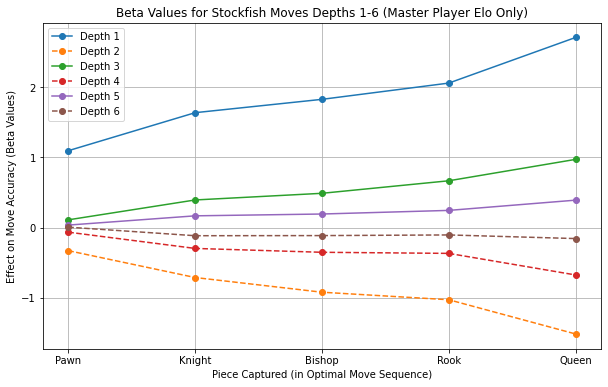

In [17]:
# create the line plot for all player data
# Depth labels
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6']

# Pieces labels
piece_labels = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Plotting
for i in range(len(depth_labels)):
    if i % 2 == 0:
        plt.plot(piece_labels, beta_weights_master[i], marker='o', linestyle='-', label=depth_labels[i])
    else:
        plt.plot(piece_labels, beta_weights_master[i], marker='o', linestyle='--', label=depth_labels[i])

plt.xlabel('Piece Captured (in Optimal Move Sequence)')
plt.ylabel('Effect on Move Accuracy (Beta Values)')
plt.title('Beta Values for Stockfish Moves Depths 1-6 (Master Player Elo Only)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
beta_weights_all_elos = combined_array = np.dstack((beta_weights_novice, beta_weights_amateur, beta_weights_advanced, beta_weights_master))
print(beta_weights_all_elos)

[[[ 1.01842323  1.11537466  1.15097811  1.09559051]
  [ 1.56014902  1.68107339  1.64909822  1.63749127]
  [ 1.77411618  1.93040347  1.94967824  1.82765892]
  [ 2.04880434  2.19387079  2.20290099  2.05933934]
  [ 2.28988738  2.66348306  2.77976516  2.70965425]]

 [[-0.22232872 -0.24141731 -0.30807986 -0.32929018]
  [-0.57413279 -0.63760148 -0.73111544 -0.71221453]
  [-0.75533116 -0.84898185 -0.9463735  -0.92163316]
  [-0.59101661 -0.78410225 -0.99318414 -1.02881075]
  [-1.29459069 -1.47542802 -1.64306116 -1.51687617]]

 [[-0.13929854 -0.07518078  0.02129115  0.11011645]
  [ 0.05448843  0.18558033  0.32384622  0.39337829]
  [ 0.10408215  0.20911721  0.3508019   0.48824554]
  [ 0.21329502  0.37443201  0.57292717  0.66673809]
  [ 0.37864918  0.55592562  0.84598424  0.97177406]]

 [[-0.03783445 -0.05782753 -0.06914661 -0.06568477]
  [-0.1206151  -0.20263266 -0.30237265 -0.29744049]
  [-0.21965895 -0.26797819 -0.35391186 -0.35247982]
  [-0.06531629 -0.17491366 -0.31432123 -0.36813595]
  [-0.

[  0   1  -1  -3  -9   2  -4  -2   3   4  -5  -6   6   5  -7   8  10  -8
   9   7  12 -12 -10 -11  11 -15 -13 -14  14 -16  13 -17 -19  15  17  19
 -18  18  16]


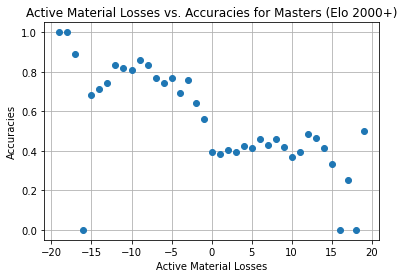

print: 0 151727 374914 0.4046981441077154
print: -1 21070 30504 0.6907290847102019
print: 3 5799 15723 0.3688227437511925
print: -3 14440 17286 0.8353580932546569
print: 9 1004 2958 0.3394185260311021
print: -9 2790 3060 0.9117647058823529
print: -4 1179 1380 0.8543478260869565
print: -2 3994 4866 0.8207973695026716
print: 5 1952 4971 0.3926775296720982
print: 1 10134 30260 0.334897554527429
print: -5 4821 5581 0.8638236875111988
print: -6 543 604 0.8990066225165563
print: 2 2811 6202 0.4532408900354724
print: 6 477 975 0.48923076923076925
print: 4 907 1911 0.47462061747776035
print: 8 335 675 0.4962962962962963
print: -8 427 467 0.9143468950749465
[ 0 -1  3 -3  9 -9 -4 -2  5  1 -5 -6  2  6  4  8 -8]


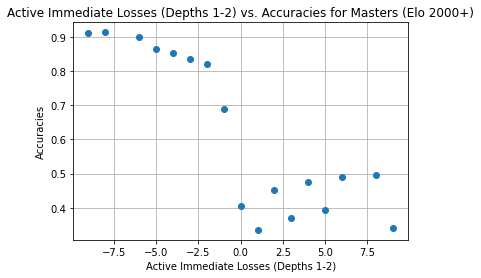

print: 0 164428 373111 0.44069459222590596
print: 3 6879 14901 0.46164686933762833
print: -3 7649 16799 0.45532472170962557
print: -9 1846 3676 0.5021762785636561
print: 1 14043 30620 0.45862181580666234
print: -1 14481 31973 0.45291339567760297
print: 2 2447 5468 0.4475128017556694
print: -2 2565 5350 0.4794392523364486
print: 9 1472 3097 0.47529867613819826
print: -5 2979 5932 0.5021915037086986
print: -6 462 822 0.5620437956204379
print: 5 2351 4704 0.4997874149659864
print: -8 272 569 0.4780316344463972
print: 6 445 942 0.4723991507430998
print: 4 819 1710 0.4789473684210526
print: 8 367 864 0.42476851851851855
print: -4 905 1799 0.5030572540300167
[ 0  3 -3 -9  1 -1  2 -2  9 -5 -6  5 -8  6  4  8 -4]


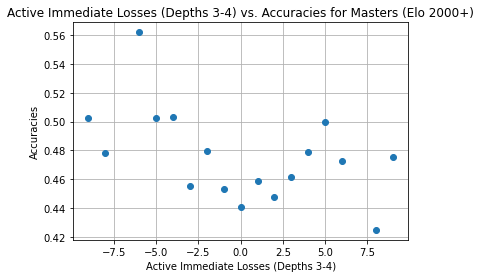

print: 0 164358 371144 0.44284159248162436
print: 1 14918 32835 0.454332267397594
print: -1 14880 32517 0.4576067902943076
print: -3 7239 15890 0.455569540591567
print: 2 2367 5355 0.44201680672268906
print: 3 6909 15558 0.44408021596606245
print: -2 2237 4900 0.45653061224489794
print: 5 2305 4820 0.4782157676348548
print: -9 1840 3902 0.4715530497180933
print: -5 2720 5654 0.48107534488857445
print: -4 872 1819 0.4793842770753161
print: 4 774 1785 0.4336134453781513
print: 9 1518 3174 0.4782608695652174
print: 8 412 805 0.5118012422360249
print: -6 367 749 0.48998664886515353
print: 6 382 802 0.4763092269326683
print: -8 312 628 0.4968152866242038
[ 0  1 -1 -3  2  3 -2  5 -9 -5 -4  4  9  8 -6  6 -8]


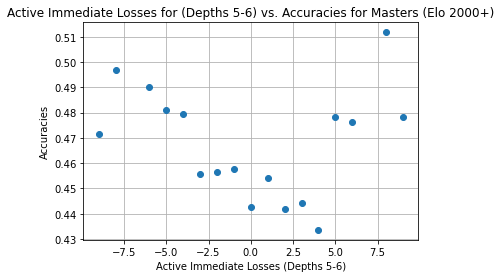

In [12]:
active_material_losses_master, accuracies_master = active_material_loss(combined_delta_materials_master, combined_move_matches_master)
plt.plot(active_material_losses_master, accuracies_master, marker='o', linestyle='')
print(active_material_losses_master)
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Material Losses')
plt.ylabel('Accuracies')
plt.title('Active Material Losses vs. Accuracies for Masters (Elo 2000+)')
plt.grid(True)
plt.show()


active_immediate_losses_master, accuracies_ail_master = active_immediate_loss_1(combined_delta_materials_master, combined_move_matches_master)
print(active_immediate_losses_master)
plt.plot(active_immediate_losses_master, accuracies_ail_master, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 1-2) vs. Accuracies for Masters (Elo 2000+)')
plt.grid(True)
plt.show()

active_immediate_losses_2_master, accuracies_ail_2_master = active_immediate_loss_2(combined_delta_materials_master, combined_move_matches_master)
print(active_immediate_losses_2_master)
plt.plot(active_immediate_losses_2_master, accuracies_ail_2_master, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses (Depths 3-4) vs. Accuracies for Masters (Elo 2000+)')
plt.grid(True)
plt.show()

active_immediate_losses_3_master, accuracies_ail_3_master = active_immediate_loss_3(combined_delta_materials_master, combined_move_matches_master)
print(active_immediate_losses_3_master)
plt.plot(active_immediate_losses_3_master, accuracies_ail_3_master, marker='o', linestyle='')
# plt.xlim(-10, 10)
# plt.ylim(0.0, 1.1)
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Accuracies')
plt.title('Active Immediate Losses for (Depths 5-6) vs. Accuracies for Masters (Elo 2000+)')
plt.grid(True)
plt.show()

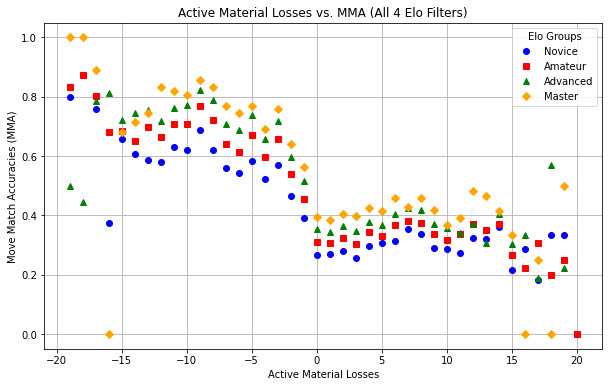

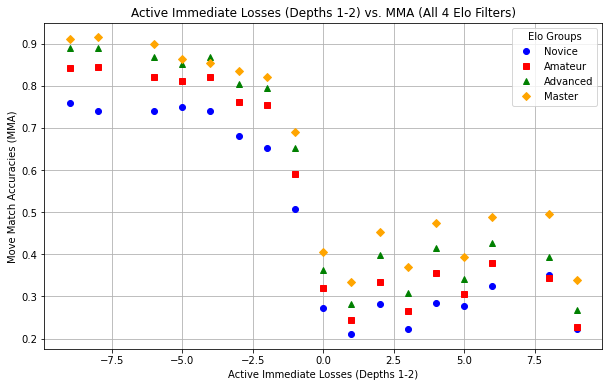

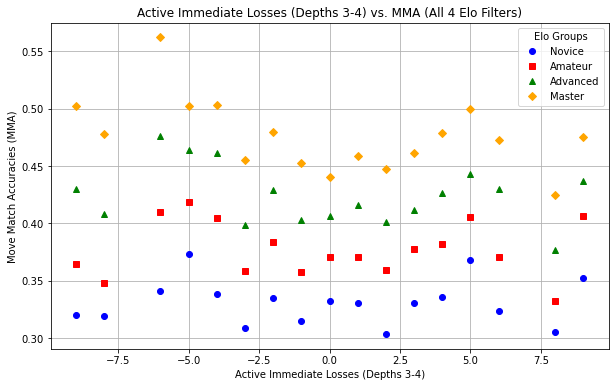

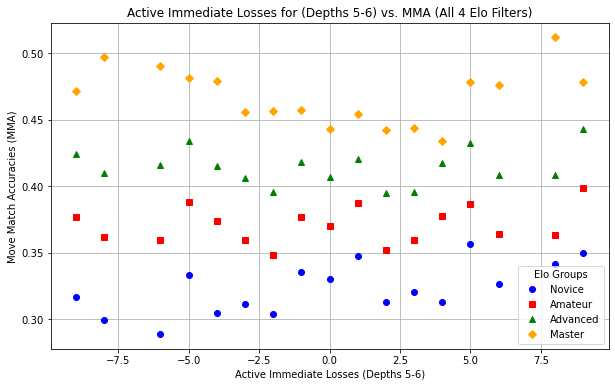

In [16]:
# merged plots across elo groups (4 plots total)
active_material_losses_novice, accuracies_novice = active_material_loss(combined_delta_materials_novice, combined_move_matches_novice)
active_material_losses_amateur, accuracies_amateur = active_material_loss(combined_delta_materials_amateur, combined_move_matches_amateur)
active_material_losses_advanced, accuracies_advanced = active_material_loss(combined_delta_materials_advanced, combined_move_matches_advanced)
active_material_losses_master, accuracies_master = active_material_loss(combined_delta_materials_master, combined_move_matches_master)
plt.figure(figsize=(10, 6))
plt.plot(active_material_losses_novice, accuracies_novice, marker='o', label='Novice', color='blue', linestyle='')
plt.plot(active_material_losses_amateur, accuracies_amateur, marker='s', label='Amateur', color='red', linestyle='')
plt.plot(active_material_losses_advanced, accuracies_advanced, marker='^', label='Advanced', color='green', linestyle='')
plt.plot(active_material_losses_master, accuracies_master, marker='D', label='Master', color='orange', linestyle='')
plt.xlabel('Active Material Losses')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Material Losses vs. MMA (All 4 Elo Filters)')
plt.legend(title='Elo Groups')
plt.grid(True)
plt.show()


active_immediate_losses_novice, accuracies_ail_novice = active_immediate_loss_1(combined_delta_materials_novice, combined_move_matches_novice)
active_immediate_losses_amateur, accuracies_ail_amateur = active_immediate_loss_1(combined_delta_materials_amateur, combined_move_matches_amateur)
active_immediate_losses_advanced, accuracies_ail_advanced = active_immediate_loss_1(combined_delta_materials_advanced, combined_move_matches_advanced)
active_immediate_losses_master, accuracies_ail_master = active_immediate_loss_1(combined_delta_materials_master, combined_move_matches_master)
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_novice, accuracies_ail_novice, marker='o', label='Novice', color='blue', linestyle='')
plt.plot(active_immediate_losses_amateur, accuracies_ail_amateur, marker='s', label='Amateur', color='red', linestyle='')
plt.plot(active_immediate_losses_advanced, accuracies_ail_advanced, marker='^', label='Advanced', color='green', linestyle='')
plt.plot(active_immediate_losses_master, accuracies_ail_master, marker='D', label='Master', color='orange', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 1-2)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses (Depths 1-2) vs. MMA (All 4 Elo Filters)')
plt.legend(title='Elo Groups')
plt.grid(True)
plt.show()

active_immediate_losses_2_novice, accuracies_ail_2_novice = active_immediate_loss_2(combined_delta_materials_novice, combined_move_matches_novice)
active_immediate_losses_2_amateur, accuracies_ail_2_amateur = active_immediate_loss_2(combined_delta_materials_amateur, combined_move_matches_amateur)
active_immediate_losses_2_advanced, accuracies_ail_2_advanced = active_immediate_loss_2(combined_delta_materials_advanced, combined_move_matches_advanced)
active_immediate_losses_2_master, accuracies_ail_2_master = active_immediate_loss_2(combined_delta_materials_master, combined_move_matches_master)
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_2_novice, accuracies_ail_2_novice, marker='o', label='Novice', color='blue', linestyle='')
plt.plot(active_immediate_losses_2_amateur, accuracies_ail_2_amateur, marker='s', label='Amateur', color='red', linestyle='')
plt.plot(active_immediate_losses_2_advanced, accuracies_ail_2_advanced, marker='^', label='Advanced', color='green', linestyle='')
plt.plot(active_immediate_losses_2_master, accuracies_ail_2_master, marker='D', label='Master', color='orange', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 3-4)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses (Depths 3-4) vs. MMA (All 4 Elo Filters)')
plt.legend(title='Elo Groups')
plt.grid(True)
plt.show()

active_immediate_losses_3_novice, accuracies_ail_3_novice = active_immediate_loss_3(combined_delta_materials_novice, combined_move_matches_novice)
active_immediate_losses_3_amateur, accuracies_ail_3_amateur = active_immediate_loss_3(combined_delta_materials_amateur, combined_move_matches_amateur)
active_immediate_losses_3_advanced, accuracies_ail_3_advanced = active_immediate_loss_3(combined_delta_materials_advanced, combined_move_matches_advanced)
active_immediate_losses_3_master, accuracies_ail_3_master = active_immediate_loss_3(combined_delta_materials_master, combined_move_matches_master)
plt.figure(figsize=(10, 6))
plt.plot(active_immediate_losses_3_novice, accuracies_ail_3_novice, marker='o', label='Novice', color='blue', linestyle='')
plt.plot(active_immediate_losses_3_amateur, accuracies_ail_3_amateur, marker='s', label='Amateur', color='red', linestyle='')
plt.plot(active_immediate_losses_3_advanced, accuracies_ail_3_advanced, marker='^', label='Advanced', color='green', linestyle='')
plt.plot(active_immediate_losses_3_master, accuracies_ail_3_master, marker='D', label='Master', color='orange', linestyle='')
plt.xlabel('Active Immediate Losses (Depths 5-6)')
plt.ylabel('Move Match Accuracies (MMA)')
plt.title('Active Immediate Losses for (Depths 5-6) vs. MMA (All 4 Elo Filters)')
plt.legend(title='Elo Groups')
plt.grid(True)
plt.show()